# AM783: Applied Markov processes | MCMC simulation of Gaussian RVs

Hugo Touchette

Started: 16 August 2019

Last updated: 30 August 2022

Python 3

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Magic command for vectorised figures
%config InlineBackend.figure_format = 'svg'

## Metropolis ratio

In [4]:
def pdfratio(dist,x,xp):
    return dist(xp)/dist(x)

In [5]:
pdfratio(stats.norm.pdf,1.0,2.0)

0.22313016014842985

## Simulation

In [6]:
# Number of steps - play with this hyperparameter
nsteps = 10**4

# Step size - play with this hyperparameter
a = 3 

xsample = np.zeros(nsteps)
cntlist = np.zeros(nsteps)

x = 0.0
cnt = 0.0 # Counter for number of accepted move

for i in range(nsteps):
    dx = 2.0*a*np.random.random()-a # Symmetric displacement with uniform U[-a,a]
    xtry = x + dx                   # Move
    
    #  Accept move with Metropolis probability
    r = np.random.random()
    if r < pdfratio(stats.norm.pdf, x, xtry): # The min over 1 is not needed. Why?
        x = xtry
        cnt += 1.0

    xsample[i] = x           # Keep sample whether move is accepted or not
    cntlist[i] = cnt/(i+1.0) # Track acceptance ratio

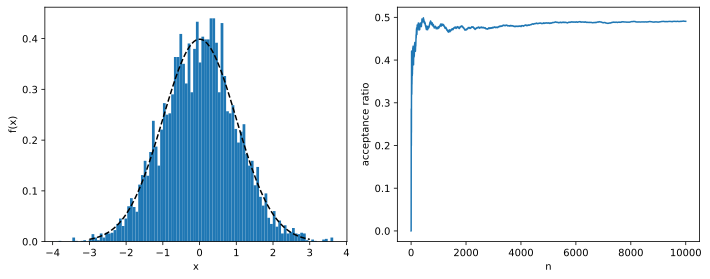

In [7]:
# Plot results
xvals = np.linspace(-3,3,100)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(xsample,100, density=True)
plt.plot(xvals, stats.norm.pdf(xvals), 'k--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.subplot(1,2,2)
plt.plot(range(nsteps),cntlist)
plt.xlabel('n')
plt.ylabel('acceptance ratio')
#plt.xscale('log')
plt.tight_layout()

A good simulation is one for which the acceptance ratio is close to 0.5.

A high acceptance ratio means that the moves are too small - they're always accepted, which is not good.

A low acceptance ratio means that the moves are too big - they're rarely accepted, which is also not good.